<a href="https://colab.research.google.com/github/cdiegor/MineracaoDeDados/blob/main/Entradas_Introdu%C3%A7%C3%A3o_%C3%A0_Minera%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados

CC0101: Introdução à Mineração de Dados
Universidade Federal do Ceará

Notebook por Mike Gelbart, baseado em slides de Mark Schmidt.

In [6]:
# importações / dependências
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(style="ticks")
from sklearn.feature_extraction.text import CountVectorizer
from skimage.io import imread, imshow

## Passos típicos na Mineração de Dados

1. Identificar pergunta/tarefa
2. Coletar dados
3. Limpar e pré-processar dados
4. Análise exploratória de dados (EDA)
5. Seleção de recursos e modelos
6. Treinar modelo
7. Avaliar e comunicar resultados
8. Implantar sistema de trabalho

(mas não necessariamente nesta ordem...)

Hoje discutiremos as etapas (3) e (4)

## Como são as entradas de dados?

Comumente são tabelas (mas nem sempre!)

In [7]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- Cada linha é um **objeto** (ou instância, ou exemplo)
- Cada coluna é um **atributo** (ou variável, característica).

## Tipos de atributos

- Categórico (por exemplo, `survived`, `embark_town`)
- Numérico (por exemplo, idade, tarifa)
- Alguns são mais ambíguos, como `pclass`: isso é categórico ou numérico?

Conversão de tipos:

- Muitos dos nossos métodos são feitos para trabalhar com recursos numéricos.
- Podemos converter categórico para numérico.

In [8]:
pd.get_dummies(titanic, columns=["embarked"]).head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,False,False,True
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,False,False,True


Se fizermos isso para todos os nossos atributos, agora podemos interpretar objetos como pontos no espaço.

In [9]:
titanic_num = pd.get_dummies(titanic, columns=["sex","embarked","class","who","adult_male","deck","embark_town","alive","alone"])
titanic_num.shape

(891, 33)

- Então agora temos 891 objetos e 33 características.
- Em outras palavras, cada objeto é um ponto no espaço de 280 dimensões.
- É por isso que o cálculo multivariável é um pré-requisito.

### Outros tipos de atributos: dados de texto

In [ ]:
text = "The University of British Columbia (UBC) is a public research university with campuses and facilities in British Columbia, Canada."

Nossa abordagem: **saco de palavras** (bag of words, vetorização).

In [ ]:
cv = CountVectorizer()
feat = cv.fit_transform([text])

In [ ]:
for word, idx in cv.vocabulary_.items():
    print("%-14s%d" % (word, feat[0,idx]))

the           1
university    2
of            1
british       2
columbia      2
ubc           1
is            1
public        1
research      1
with          1
campuses      1
and           1
facilities    1
in            1
canada        1


- Bag of words ignora a ordem das palavras, mas ainda pode funcionar bem.
- Você pode interpretar cada documento como um ponto no espaço, calcular distâncias.

### Outros tipos de atributos: imagens

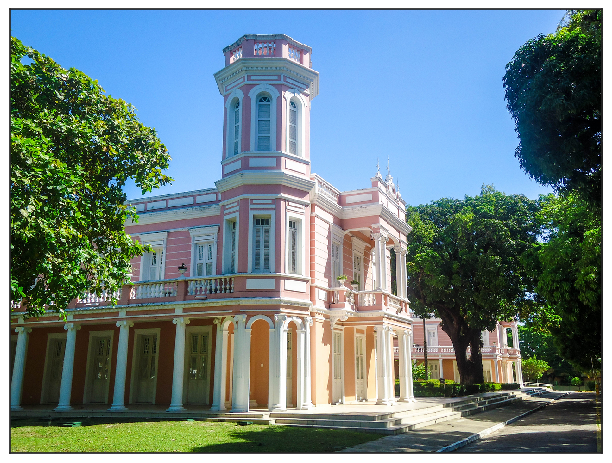

In [ ]:
img = imread("https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Universidade_Federal_do_Cear%C3%A1.png/1280px-Universidade_Federal_do_Cear%C3%A1.png")
plt.xticks([])
plt.yticks([])
imshow(img);

Photo credit: [Wikipedia: UBC](https://en.wikipedia.org/wiki/University_of_British_Columbia#/media/File:Irving_K._Barber_Library.jpg) by [CjayD](https://www.flickr.com/people/85424459@N08/), [CC BY 2.0](http://creativecommons.org/licenses/by/2.0).

In [ ]:
img.shape

(1344, 2048, 3)

In [ ]:
img[0:2,0:2,:]

array([[[45, 58, 90],
        [45, 59, 88]],

       [[45, 59, 88],
        [45, 59, 88]]], dtype=uint8)

In [ ]:
img.flatten().shape

(8257536,)

- Agora, novamente, a imagem é um ponto no espaço.
- Mas agora o espaço tem 8.257.536 dimensões!
- Falaremos sobre isso no final do curso.

## Limpeza de dados

- Aprendizado de Máquina normalmente assumem dados "limpos".
- Maneiras pelas quais os dados podem não ser "limpos":
  - ruído (por exemplo, distorção no telefone).
  - outliers (por exemplo, entrada de dados ou erro de instrumento).
  - valores ausentes (nenhum valor disponível ou não aplicável)
  - dados duplicados (repetições ou formatos de armazenamento diferentes).
- Qualquer um deles pode levar a problemas nas análises.
- deseja corrigir esses problemas, se possível.
- alguns métodos de Aprendizado de Máquina são robustos a eles.
- Muitas vezes, Aprendizado de Máquina é a melhor maneira de detectar/corrigir esses problemas.


## De quantos dados precisamos?

- Uma pergunta difícil, se não impossível, de responder.
- Resposta usual: "quanto mais, melhor".
  - Com o aviso: "desde que a qualidade não sofra".
- Outra resposta popular: "dez vezes o número de recursos".
  - Não gosto dessa visão. Atributos não são o inimigo!

## Agregação de recursos

- Combine recursos para formar novos
- Útil se houver poucos exemplos de um caso específico

In [ ]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
titanic_agg = titanic.copy()

# Agrega decks A e B na categoria "upper"
titanic_agg["upper"] = titanic_agg['deck'].isin(("A","B"))
titanic_agg.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,upper
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,False
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,False
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,False


(Não mostrado: ainda precisamos consertar os NaNs aqui!)

## Seleção de atributos

In [ ]:
titanic_id = titanic.copy()

# Adicionando um atributo irrelevante
titanic_id['id'] = titanic_id.index
titanic_id.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,id
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,4


- Remova atributos que não são relevantes para a tarefa.
- `id` provavelmente não é relevante para predição.

## Transformação de atributos

### Discretização (binning): transformar dados numéricos em categóricos

In [ ]:
titanic['age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

In [ ]:
ages = pd.cut(titanic['age'], bins=(0,20,30,100))
ages_cat = pd.get_dummies(ages)
pd.concat([titanic['age'], ages_cat],axis=1).head()

,age,"(0, 20]","(20, 30]","(30, 100]"
0,22.0,0,1,0
1,38.0,0,0,1
2,26.0,0,1,0
3,35.0,0,0,1
4,35.0,0,0,1


#### Transformações matemáticas
- por exemplo, log, exp, quadrado, sqrt, etc.
- também, escala/normalização

In [ ]:
titanic_mod = titanic.copy()

# fare --> sqrt(fare)
titanic_mod['fare'] = np.sqrt(titanic_mod['fare'])
titanic_mod.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,2.692582,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,8.442944,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,2.815138,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,7.286975,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,2.837252,S,Third,man,True,NaN,Southampton,no,True


Exemplo de caso de uso: algo precisa ser não negativo (exp) ou não deve ser não negativo (log).

## Análise exploratória de dados (EDA)

- Você deve sempre "olhar" para os dados primeiro.
- Mas como você "olha" para recursos e objetos de alta dimensão?
  - Estatísticas resumidas
  - Visualização

## Estatísticas de resumo categórico

- Algumas estatísticas de resumo para uma variável categórica:
  - **Frequências** de diferentes classes.
  - **Moda**: categoria que ocorre com mais frequência.


In [ ]:
titanic['deck'].value_counts(normalize=True) # frequencies

C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: deck, dtype: float64

In [ ]:
titanic['deck'].mode()[0]

'C'

## Estatísticas de resumo contínuo

- Medidas de localização:
  - **Média**: valor médio.
  - **Mediana**: valor tal que metade dos pontos são maiores/menores.
  - **Quantis**: valor tal que $t$ fração de pontos são menores.
- Medidas de dispersão:
  - **Intervalo**: valores mínimo e máximo.
  - **Variância**: mede o quão longe os valores estão da média.
  - Raiz quadrada da variância é **desvio padrão**.
  - **Intervalos de intequantis**: diferença entre quantis

In [ ]:
titanic['fare'].mean()

32.2042079685746

In [ ]:
titanic['fare'].median()

14.4542

In [ ]:
titanic['fare'].quantile((0.25,0.5,0.75))

0.25     7.9104
0.50    14.4542
0.75    31.0000
Name: fare, dtype: float64

In [ ]:
titanic['fare'].min()

0.0

In [ ]:
titanic['fare'].max()

512.32920000000001

In [ ]:
titanic['fare'].var()

2469.436845743117

In [ ]:
titanic['fare'].std()

49.693428597180905

Observe que a média e o desvio padrão são sensíveis a valores extremos:

In [ ]:
data = [0,1,2,3,3,5,7,8,9,10,14,15,17,200] # " 200"é um outlier
print("Mean with outlier   :", np.mean(data))
print("Mean without outlier:", np.mean(data[:-1]))

Mean with outlier   : 21.0
Mean without outlier: 7.23076923077


In [ ]:
print("Std with outlier   :", np.std(data))
print("Std without outlier:", np.std(data[:-1]))

Std with outlier   : 49.9127810714
Std without outlier: 5.35154680952


Enquanto a mediana não é:

In [ ]:
print("Median with outlier   :", np.median(data))
print("Median without outlier:", np.median(data[:-1]))

Median with outlier   : 7.5
Median without outlier: 7.0


## Distâncias e similaridades

- Há também estatísticas de resumo entre recursos.
  - Distância de Hamming:
    - Número de elementos nos vetores que não são iguais.
  - Distância euclidiana:
    - Quão distantes estão os vetores?
  - Correlação:
    - Um aumenta/diminui linearmente conforme o outro aumenta?
    - Entre -1 e 1.

## Limitações das estatísticas de resumo

- Estatísticas de resumo podem ser enganosas
- Um exemplo famoso é o [quarteto de Anscombe](https://en.wikipedia.org/wiki/Anscombe%27s_quartet), quatro conjuntos de dados com:
  - Quase as mesmas médias.
  - Quase as mesmas variâncias.
  - Quase as mesmas correlações.
  - Quase os mesmos ajustes lineares.
  - Parecem completamente diferentes.

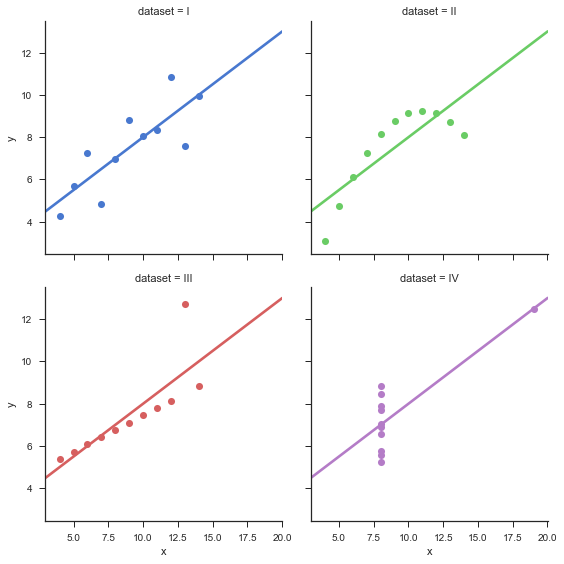

In [ ]:
# Code below from seaborn documentation: https://seaborn.pydata.org/examples/anscombes_quartet.html

# Carrega os conjuntos de dados do quarteto de Anscombe's
anscombe = sns.load_dataset("anscombe")

# Mostra o resultado de uma regressão linear para cada conjunto de dados
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1});

## Visualização

- Você pode aprender muito com gráficos 2D dos dados:
  - Padrões, tendências, outliers, padrões incomuns.

- Usaremos a biblioteca `matplotlib` para fazer a maioria dos nossos gráficos básicos.
- Para gráficos mais elaborados, você pode tentar `seaborn`.

## Plot básico

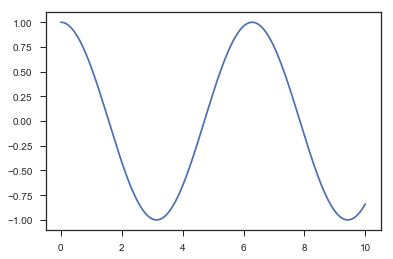

In [ ]:
x = np.linspace(0,10,1000)
plt.plot(x, np.cos(x));

In [ ]:
iris = sns.load_dataset("iris") # Flores iris, um conjunto de dados clássico
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Histogram

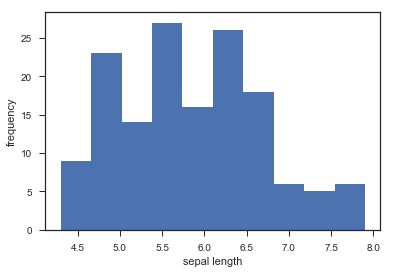

In [ ]:
plt.hist(iris['sepal_length'])
plt.xlabel('sepal length')
plt.ylabel('frequency');
# sns.distplot(iris["sepal_length"]);

## Box plot

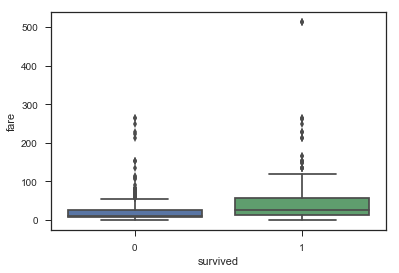

In [ ]:
sns.boxplot(x="survived", y="fare", data=titanic);

## Gráfico de dispersão

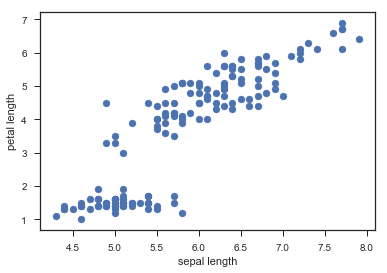

In [ ]:
plt.scatter(iris['sepal_length'], iris['petal_length'])
plt.xlabel('sepal length')
plt.ylabel('petal length');

## Matriz de gráficos de dispersão

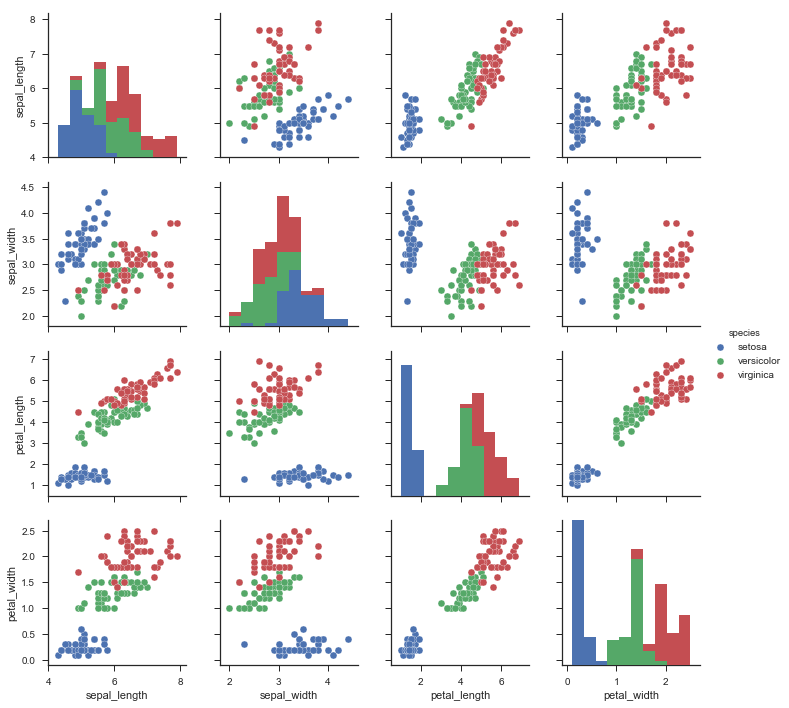

In [ ]:
sns.pairplot(iris, hue="species");

- Este é o único momento em que falaremos sobre limpeza de dados e AED.
- Isso não é representativo do tempo normalmente dedicado a essas tarefas.
  - Na verdade, a limpeza de dados costuma ser a etapa que mais consome tempo.
- Esta é uma fraqueza do curso.
  - Mas não é tão ruim se você estiver ciente disso.

## Resumo

- Etapas típicas de mineração de dados:
  - Envolve coleta de dados, pré-processamento, análise e avaliação.
- Representação de objeto-recurso e recursos categóricos/numéricos.
  - Transformação de objetos não vetoriais em representações vetoriais.
- Transformações de recursos:
  - Para abordar a coleta de cupons ou simplificar relacionamentos entre variáveis.
- Exploração de dados:
  - Estatísticas resumidas e visualização de dados.